In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [17]:
df = pd.read_csv('../data/base.csv')
os.makedirs('images',exist_ok=True)

In [18]:
df.columns

Index(['MonthlyDebtPayments', 'LoanAmount', 'NetWorth', 'CreditScore',
       'CheckingAccountBalance', 'BankruptcyHistory', 'LoanDuration',
       'EducationLevel', 'UtilityBillsPaymentHistory', 'TotalLiabilities',
       'MaritalStatus', 'LengthOfCreditHistory', 'AnnualIncome',
       'HomeOwnershipStatus', 'PreviousLoanDefaults',
       'CreditCardUtilizationRate', 'PaymentHistory', 'TotalAssets',
       'EmploymentStatus', 'SavingsAccountBalance', 'Age',
       'NumberOfCreditInquiries', 'JobTenure', 'DebtToIncomeRatio',
       'LoanApproved', 'NumberOfOpenCreditLines', 'LoanPurpose',
       'InterestRate', 'NumberOfDependents'],
      dtype='object')

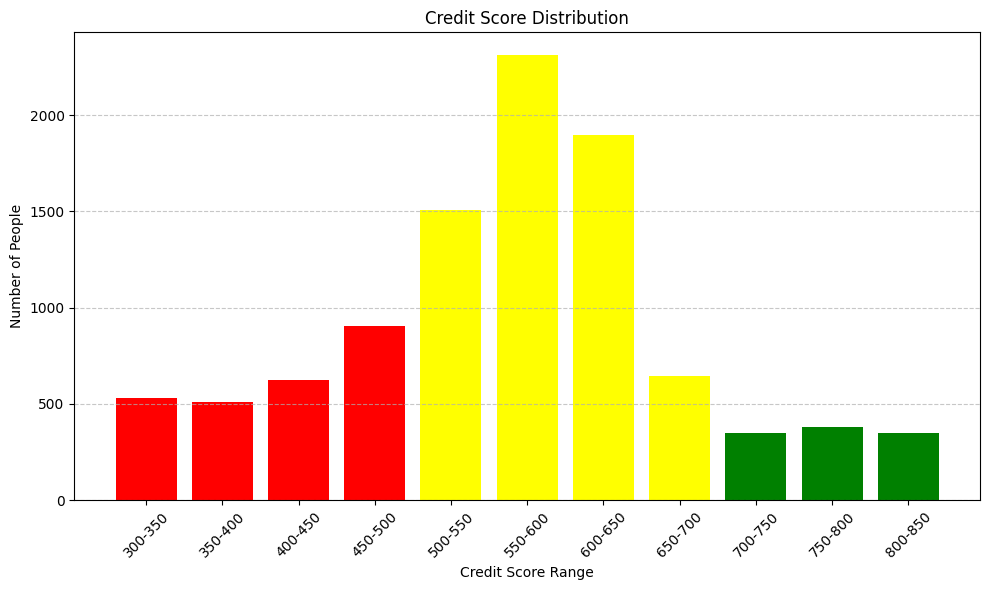

In [19]:
# Define bins and labels
bins = np.arange(300, 851, 50)
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

# Bin the CreditScore data
df['CreditScoreBin'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)

# Count the number of people in each bin
score_counts = df['CreditScoreBin'].value_counts().sort_index()

# Define bar colors based on bin ranges
colors = ['red' if int(label.split('-')[0]) < 500 else 
          'yellow' if int(label.split('-')[0]) < 700 else 
          'green' for label in labels]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(score_counts.index, score_counts.values, color=colors)

# Customizing the plot
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score Range')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("./images/fig1.png")
plt.show()

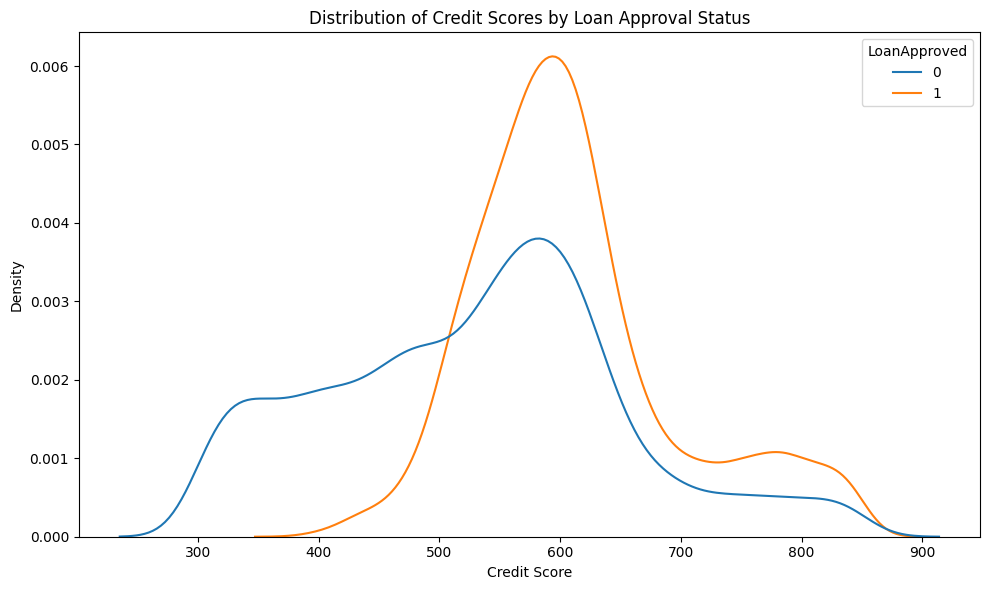

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='CreditScore', hue='LoanApproved', common_norm=False)
plt.title('Distribution of Credit Scores by Loan Approval Status')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('images/fig2.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

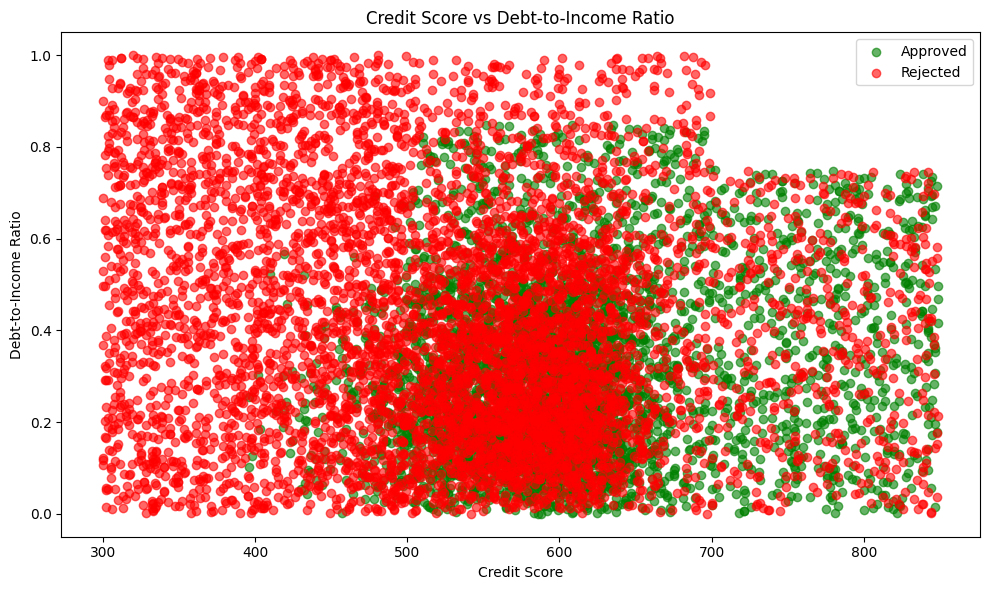

In [21]:
plt.figure(figsize=(10, 6))
approved = df[df['LoanApproved'] == 1]
rejected = df[df['LoanApproved'] == 0]

plt.scatter(approved['CreditScore'], approved['DebtToIncomeRatio'], 
           alpha=0.6, label='Approved', c='green')
plt.scatter(rejected['CreditScore'], rejected['DebtToIncomeRatio'], 
           alpha=0.6, label='Rejected', c='red')
plt.xlabel('Credit Score')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Credit Score vs Debt-to-Income Ratio')
plt.legend()
plt.tight_layout()
plt.savefig('images/fig3.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

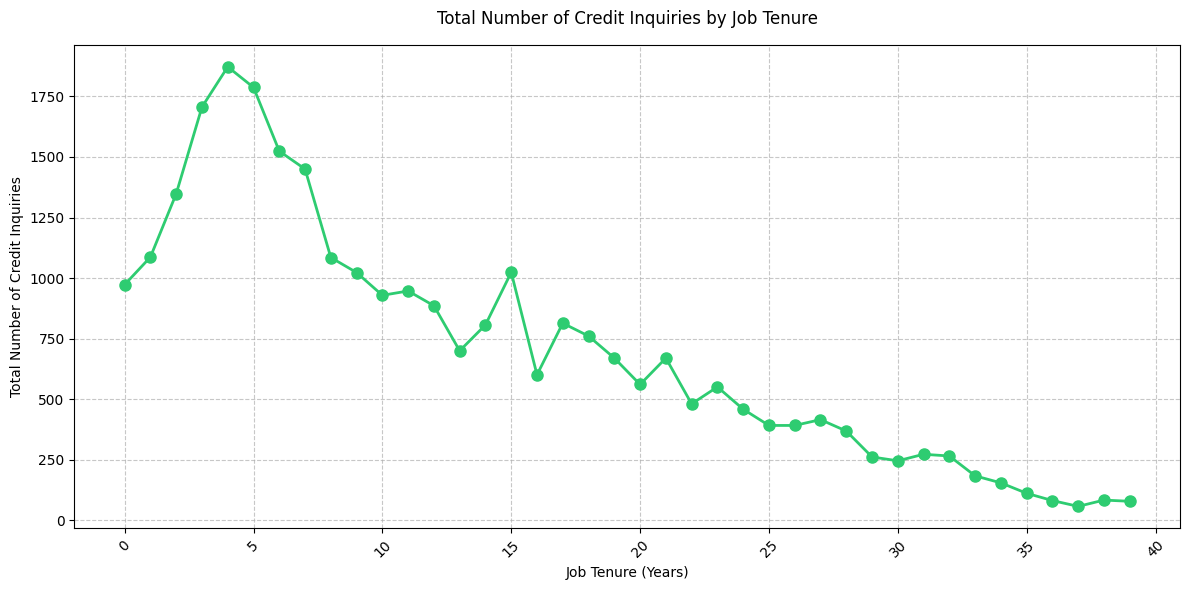

In [22]:
# Group by JobTenure and sum the NumberOfCreditInquiries
tenure_inquiries = df.groupby('JobTenure')['NumberOfCreditInquiries'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(tenure_inquiries['JobTenure'], 
         tenure_inquiries['NumberOfCreditInquiries'], 
         marker='o',  # Add markers at each data point
         linewidth=2, 
         markersize=8,
         color='#2ecc71')  # Use a nice green color

# Customize the plot
plt.title('Total Number of Credit Inquiries by Job Tenure', fontsize=12, pad=15)
plt.xlabel('Job Tenure (Years)', fontsize=10)
plt.ylabel('Total Number of Credit Inquiries', fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add value labels on top of each point
# for x, y in zip(tenure_inquiries['JobTenure'], tenure_inquiries['NumberOfCreditInquiries']):
#     plt.text(x, y + 0.5, f'{int(y)}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('./images/fig4.png')
plt.show()

/tmp/ipykernel_1944/3195169081.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



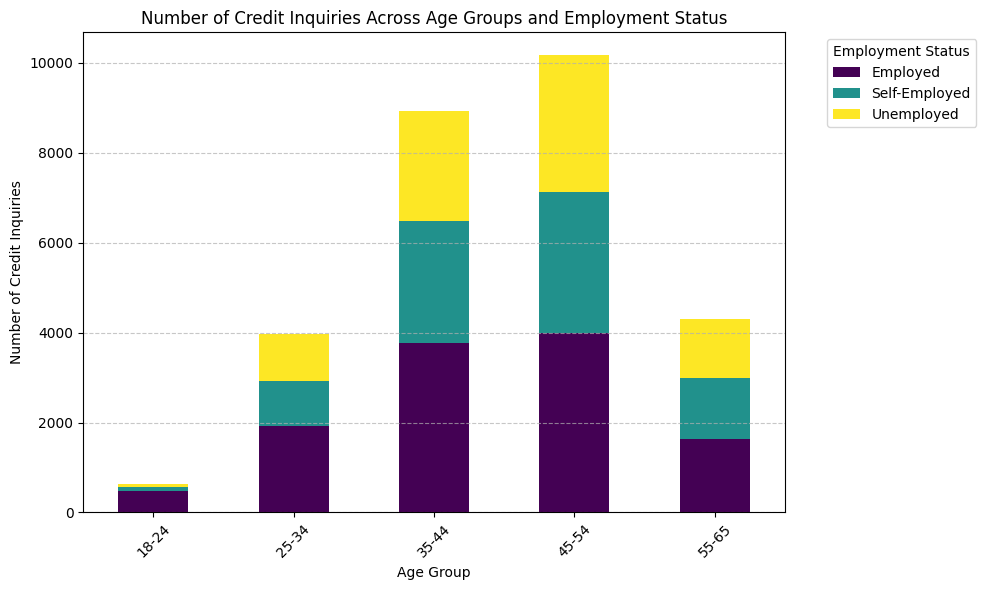

In [23]:
bins = [18, 25, 35, 45, 55, 66]
labels = ['18-24', '25-34', '35-44', '45-54', '55-65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by AgeGroup and EmploymentStatus, summing NumberOfCreditInquiries
grouped_data = df.groupby(['AgeGroup', 'EmploymentStatus'])['NumberOfCreditInquiries'].sum().unstack()

# Plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')

# Customizing the plot
plt.title('Number of Credit Inquiries Across Age Groups and Employment Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Credit Inquiries')
plt.xticks(rotation=45)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

/tmp/ipykernel_1944/718637541.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



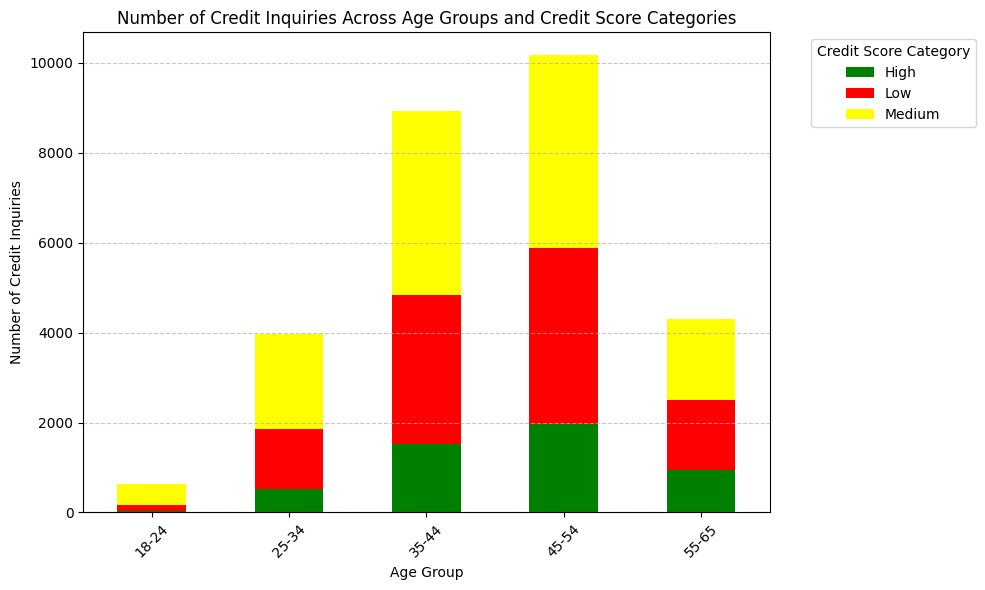

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins for AgeGroup
bins = [18, 25, 35, 45, 55, 66]
labels = ['18-24', '25-34', '35-44', '45-54', '55-65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Categorize Credit Score
def categorize_credit_score(score):
    if score < 500:
        return 'Low'
    elif score < 700:
        return 'Medium'
    else:
        return 'High'

df['CreditScoreCategory'] = df['CreditScore'].apply(categorize_credit_score)

# Group by AgeGroup and CreditScoreCategory, summing NumberOfCreditInquiries
grouped_data = df.groupby(['AgeGroup', 'CreditScoreCategory'])['NumberOfCreditInquiries'].sum().unstack()

# Define colors for categories
colors = {'Low': 'red', 'Medium': 'yellow', 'High': 'green'}

# Plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors[col] for col in grouped_data.columns])

# Customizing the plot
plt.title('Number of Credit Inquiries Across Age Groups and Credit Score Categories')
plt.xlabel('Age Group')
plt.ylabel('Number of Credit Inquiries')
plt.xticks(rotation=45)
plt.legend(title='Credit Score Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('./images/fig5.png')
# Show the plot
plt.show()


In [25]:
import pandas as pd
import plotly.express as px

# Select relevant features and preprocess
features = ['NumberOfOpenCreditLines', 'LoanApproved', 'NumberOfCreditInquiries', 'DebtToIncomeRatio']
df_pcp = df[features].copy()

# Add CreditScoreCategory for coloring
def categorize_credit_score(score):
    if score < 500:
        return 'Low'
    elif score < 700:
        return 'Medium'
    else:
        return 'High'

df_pcp['CreditScoreCategory'] = df['CreditScore'].apply(categorize_credit_score)

# Map CreditScoreCategory to numeric values for coloring
# Adjusting the numeric mapping to spread the colors more evenly
color_map = {'Low': 0, 'Medium': 0.5, 'High': 1}
df_pcp['CreditScoreNumeric'] = df_pcp['CreditScoreCategory'].map(color_map)

# Plot using Plotly with adjusted color scale
fig = px.parallel_coordinates(
    df_pcp,
    color='CreditScoreNumeric',
    dimensions=features,
    color_continuous_scale=[
        [0, 'red'],
        [0.5, 'yellow'],
        [1, 'green']
    ],
    labels={
        'NumberOfOpenCreditLines': 'Open Credit Lines',
        'LoanApproved': 'Loan Approved',
        'NumberOfCreditInquiries': 'Credit Inquiries',
        'DebtToIncomeRatio': 'Debt-to-Income Ratio',
    },
    range_color=[0, 1]  # Fix the color range explicitly
)

# Normalize all dimensions to [0,1] for consistent color display
fig.update_traces(dimensions=[
    dict(range=[0, 1], 
         values=(df_pcp['NumberOfOpenCreditLines'] - df_pcp['NumberOfOpenCreditLines'].min()) / 
                (df_pcp['NumberOfOpenCreditLines'].max() - df_pcp['NumberOfOpenCreditLines'].min()),
         label='Open Credit Lines'),
    dict(range=[0, 1], 
         values=df_pcp['LoanApproved'],
         label='Loan Approved'),
    dict(range=[0, 1], 
         values=(df_pcp['NumberOfCreditInquiries'] - df_pcp['NumberOfCreditInquiries'].min()) / 
                (df_pcp['NumberOfCreditInquiries'].max() - df_pcp['NumberOfCreditInquiries'].min()),
         label='Credit Inquiries'),
    dict(range=[0, 1], 
         values=df_pcp['DebtToIncomeRatio'],
         label='Debt-to-Income Ratio'),
])

# Show the plot
fig.show()

Model Performance:
Mean Squared Error (MSE): 11926.17
Mean Absolute Error (MAE): 85.70
R² Score: 0.14


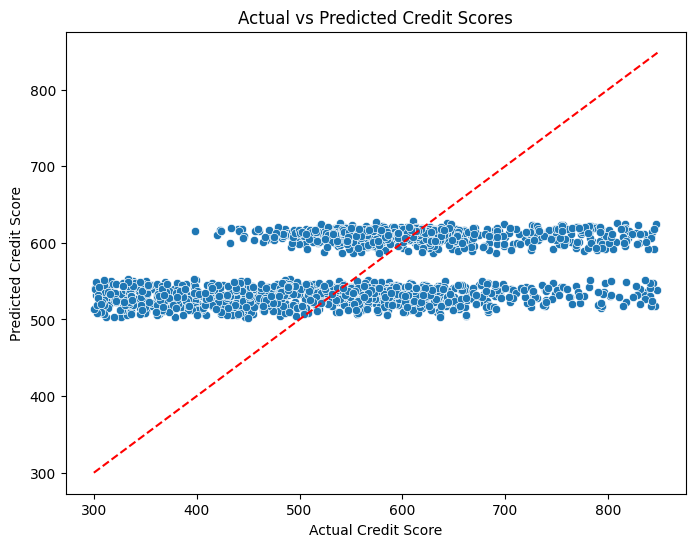

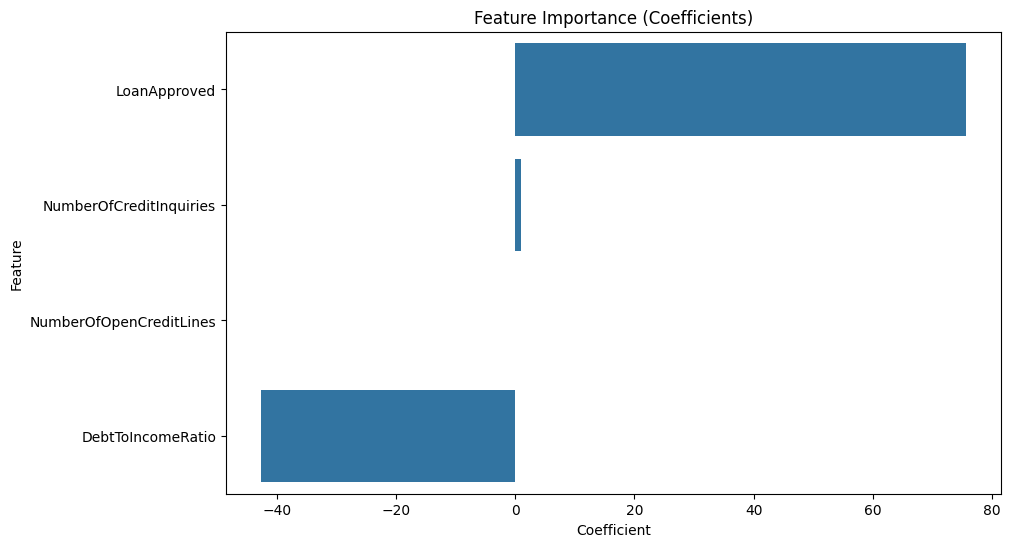

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../data/base.csv')

# Subset relevant features
features = ['NumberOfOpenCreditLines', 'LoanApproved', 'NumberOfCreditInquiries', 'DebtToIncomeRatio']
target = 'CreditScore'

# Handle missing values (drop rows with NaNs in selected columns for simplicity)
data = data[features + [target]].dropna()

# Split into features (X) and target (y)
X = data[features]
y = data[target]

# Encode categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores')
plt.show()

# Feature Importance (Coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


Classification Report:
              precision    recall  f1-score   support

         Low       0.43      0.42      0.42       532
      Medium       0.68      0.80      0.73      1239
        High       0.00      0.00      0.00       229

    accuracy                           0.61      2000
   macro avg       0.37      0.41      0.38      2000
weighted avg       0.53      0.61      0.57      2000



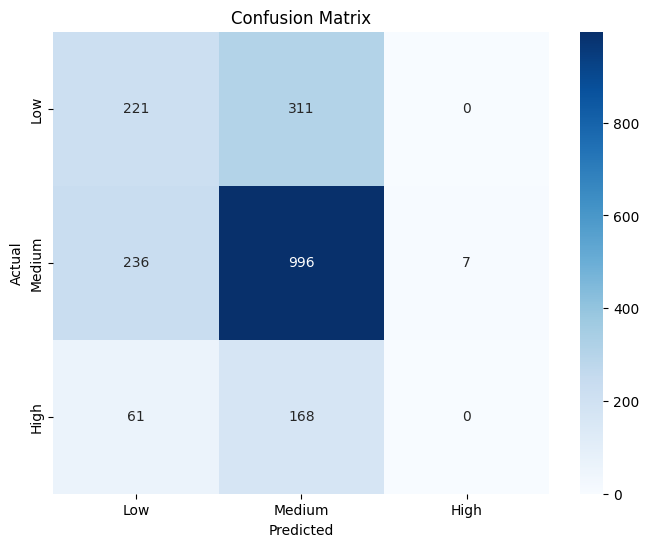

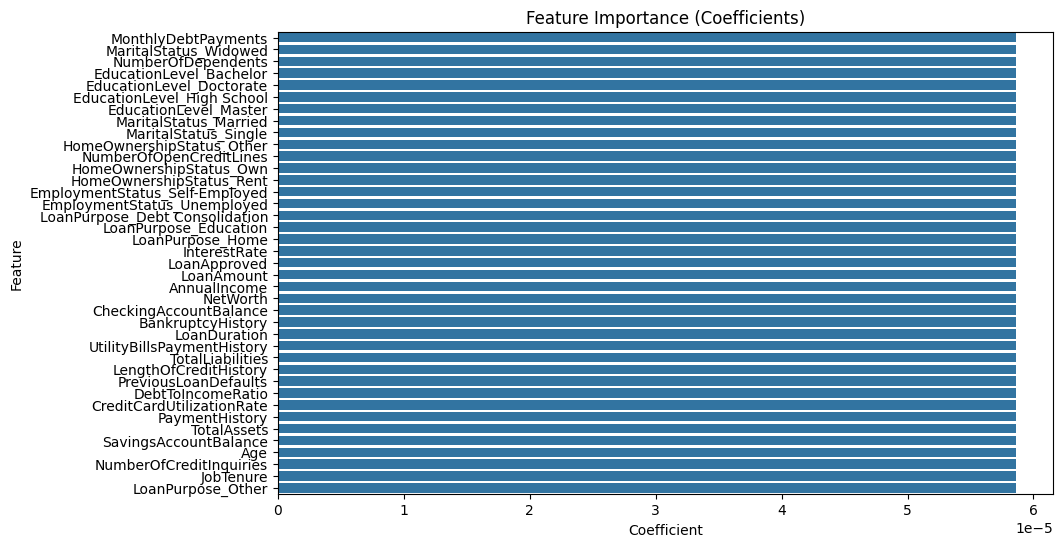

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mord import LogisticAT  # For ordinal logistic regression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../data/base.csv')

# Categorize the Credit Score into Low, Medium, and High
def categorize_credit_score(score):
    if score < 500:
        return 0  # Low
    elif score < 700:
        return 1  # Medium
    else:
        return 2  # High

data['CreditScoreCategory'] = data['CreditScore'].apply(categorize_credit_score)

# Define features and target
features = [col for col in data.columns if col != 'CreditScoreCategory' and col != 'CreditScore']
target = 'CreditScoreCategory'

# Handle missing values (drop rows with NaNs for simplicity)
data = data[features + [target]].dropna()

# Split into features (X) and target (y)
X = data[features]
y = data[target]

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit an ordinal logistic regression model
model = LogisticAT(alpha=1.0)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (Coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


Classification Report (With Rule):
              precision    recall  f1-score   support

         Low       0.44      0.41      0.42       532
      Medium       0.65      0.65      0.65      1239
        High       0.14      0.17      0.16       229

    accuracy                           0.53      2000
   macro avg       0.41      0.41      0.41      2000
weighted avg       0.54      0.53      0.53      2000



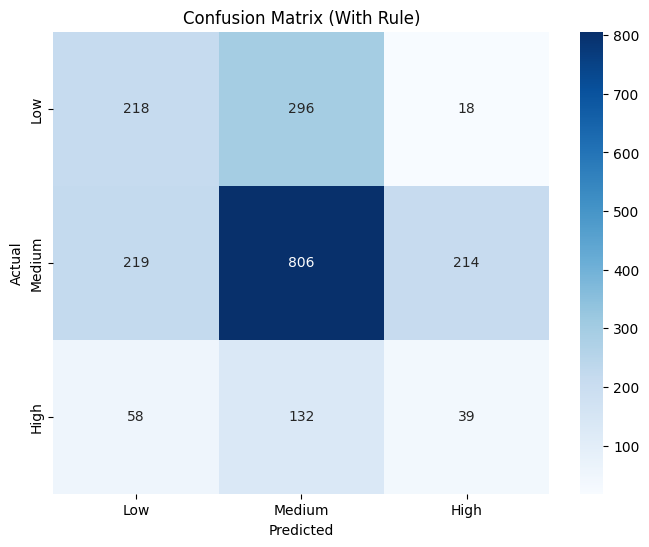

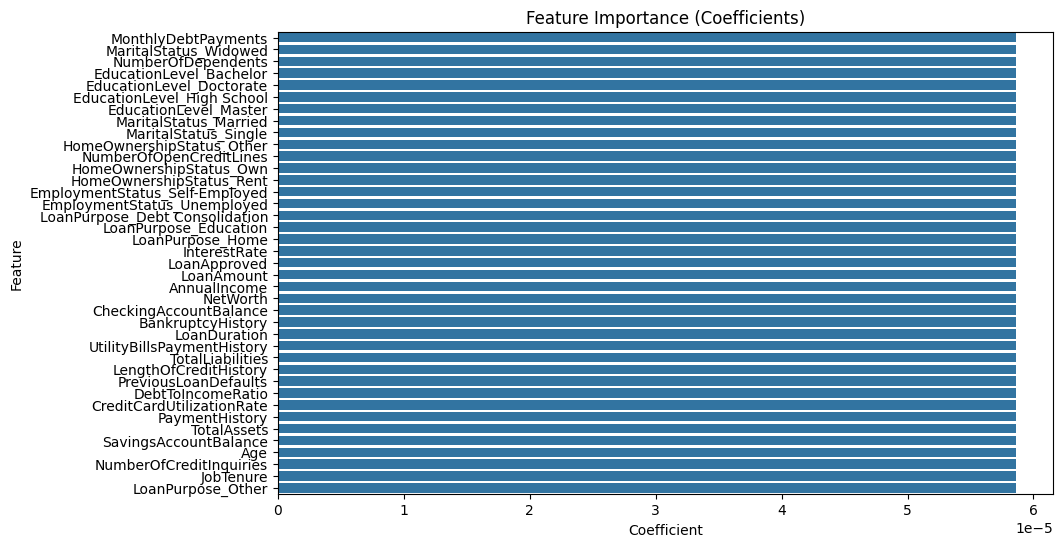

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mord import LogisticAT  # For ordinal logistic regression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../data/base.csv')

# Categorize the Credit Score into Low, Medium, and High
def categorize_credit_score(score):
    if score < 500:
        return 0  # Low
    elif score < 700:
        return 1  # Medium
    else:
        return 2  # High

data['CreditScoreCategory'] = data['CreditScore'].apply(categorize_credit_score)

# Define features and target
features = [col for col in data.columns if col != 'CreditScoreCategory' and col != 'CreditScore']
target = 'CreditScoreCategory'

# Handle missing values (drop rows with NaNs for simplicity)
data = data[features + [target]].dropna()

# Split into features (X) and target (y)
X = data[features]
y = data[target]

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit an ordinal logistic regression model
model = LogisticAT(alpha=1.0)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Apply the rule
rule_condition = (X_test['LoanApproved'] == 1) & (X_test['DebtToIncomeRatio'] < 0.2)
y_pred_with_rule = np.where(rule_condition, 2, y_pred)  # Override to 'High' (2) when the rule applies

# Evaluate the updated predictions
print("Classification Report (With Rule):")
print(classification_report(y_test, y_pred_with_rule, target_names=['Low', 'Medium', 'High']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_with_rule)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix (With Rule)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (Coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
